Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


activation function

In [ ]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

small example

In [ ]:
x = np.array([8, 7, 2, 15, 40]).reshape(-1, 1)
X_1 = np.c_[np.ones((len(x), 1)), x]
y = np.array([0, 0, 0, 1, 1])
X_1.shape

(5, 2)

In [ ]:
weight = np.zeros(X_1.shape[1])
alpha = 0.01
num_of_iterations = 1000

In [ ]:
for i in range(num_of_iterations):
    dot = np.dot(X_1, weight)
    act_function = sigmoid(dot)
    gradient = np.dot(X_1.T, (act_function - y)) / y.size

    weight -= alpha * gradient

In [ ]:
results = sigmoid(np.dot(X_1, weight))
results = (results > 0.5)
results.astype(int)

array([0, 0, 0, 1, 1])

big example

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')



In [ ]:
y = df['target']

df.drop(columns=['target'], inplace=True)

x_train = df.sample(frac=0.8, random_state=42)
x_test = df.drop(x_train.index)

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

y_train = y[x_train.index]
y_test = y[x_test.index]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'PCA projection in 2D\nExplaneid variance is: [3248.405]')

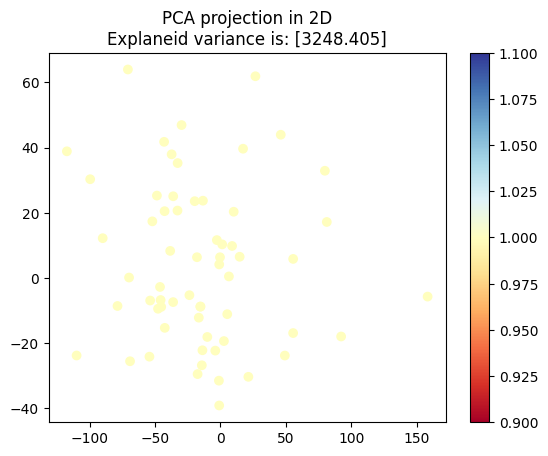

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x_ = np.array(x_train)
y_ = np.array(y_train)
y_t = np.array(y_test)
pca = PCA(n_components= 2).fit(x_, y_)
X2D = pca.transform(x_test)

ev = pca.explained_variance_.sum()

plt.scatter(X2D[:,0], X2D[:,1], c = y_t, cmap = "RdYlBu")
plt.colorbar()
plt.title(f"PCA projection in 2D\nExplaneid variance is: [{round(ev,3)}]")

In [ ]:
weight = np.zeros(x_train.shape[1])
alpha = 0.001
num_of_iterations = 1000


for i in range(num_of_iterations):
      dot = np.dot(x_train,weight)
      act = sigmoid(dot)

      weight  -= alpha * np.dot(x_train.T, (act - y_train))/y_train.size


results = sigmoid(np.dot(x_test, weight))
results = (results > 0.5)
accuracy = np.mean(results.astype(int) == y_test)
print("Final Accuracy:", 100*accuracy)

Final Accuracy: 100.0


split2

In [ ]:
y = df['target']
x = df.drop(columns=['target'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'PCA projection in 2D\nExplaneid variance is: [3316.595]')

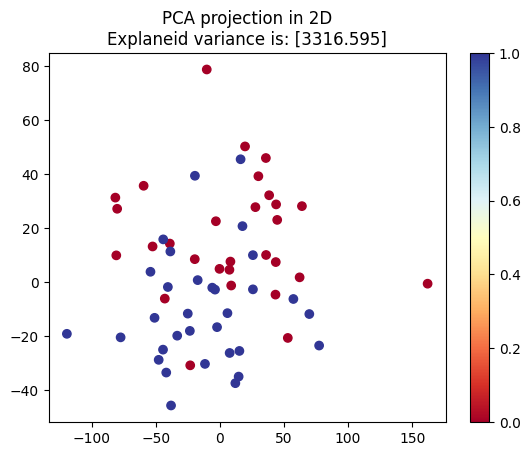

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components= 2).fit(x_train, y_train)
X2D = pca.transform(x_test)

ev = pca.explained_variance_.sum()

plt.scatter(X2D[:,0], X2D[:,1], c = y_test, cmap = "RdYlBu")
plt.colorbar()
plt.title(f"PCA projection in 2D\nExplaneid variance is: [{round(ev,3)}]")

In [ ]:
weight = np.zeros(x_train.shape[1])
alpha = 0.00001
num_of_iterations = 100000


for i in range(num_of_iterations):
      dot = np.dot(x_train,weight)
      act = sigmoid(dot)

      weight  -= alpha * np.dot(x_train.T, (act - y_train))/y_train.size


results = sigmoid(np.dot(x_test, weight))
results = (results > 0.5)
accuracy = np.mean(results.astype(int) == y_test)
print("Final Accuracy:", 100*accuracy)  #test acc

Final Accuracy: 81.9672131147541


results

In [ ]:
def accuracy(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    return correct / len(y_true)

def precision(y_true, y_pred):
    true_positives = sum((y_t == 1 and y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    predicted_positives = sum(y_p == 1 for y_p in y_pred)
    return true_positives / predicted_positives if predicted_positives != 0 else 0

def recall(y_true, y_pred):
    true_positives = sum((y_t == 1 and y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    actual_positives = sum(y_t == 1 for y_t in y_true)
    return true_positives / actual_positives if actual_positives != 0 else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0


prec = precision(y_test, results.astype(int))
rec = recall(y_test, results.astype(int))
f1 = f1_score(y_test, results.astype(int))


print("Precision:", prec*100)
print("Recall:", rec*100)
print("F1-score:", f1*100)


Precision: 83.87096774193549
Recall: 81.25
F1-score: 82.53968253968253


conclusion

    The model achieved an accuracy of 81.97% on the test set. The precision of the model was 83.87%, indicating that when the model predicts an
    instance to be positive, it is correct most of the time. The recall was 81.25%, suggesting that the model was able to identify a significant
    proportion of all actual positive instances. The F1-score, which is the harmonic mean of precision and recall, was 82.54%.

    These results suggest that the model is well-balanced in terms of precision and recall, and it’s able to predict positive instances accurately
    most of the time. The high F1-score indicates that the model has a good balance between precision and recall. This model seems to be suitable
    for this data.

Challenges

    1- The learning rate was set to a very small value, which could make the model converge slowly, especially if the optimal weights are far from the initial weights.

    2 - Overfitting: If the model is trained for too many iterations, it might overfit the training data, performing well on the training data but poorly on unseen data.
    